In [1]:
import numpy as np
from scipy.integrate import odeint, solve_ivp
import matplotlib.pyplot as plt
import pandas as pd

def pol2cart(r, tet, phi):
    x = r*np.sin(tet)*np.cos(phi)
    y = r*np.sin(tet)*np.sin(phi)
    z = r*np.cos(tet)
    return x,y,z

def cart2pol(vec):
    x = vec[0]
    y = vec[1]
    z = vec[2]
    r = np.linalg.norm(vec)
    tet = np.arccos(z/r)
    phi = np.arctan(y/x)
    return r, tet, phi

def r_ort(tet, phi):
    x = np.sin(tet)*np.cos(phi)
    y = np.sin(tet)*np.sin(phi)
    z = np.cos(tet)
    return np.array([x, y, z])

def tet_ort(tet, phi):
    x = np.cos(tet)*np.cos(phi)
    y = np.cos(tet)*np.sin(phi)
    z = -np.sin(tet)
    return np.array([x, y, z])

def phi_ort(tet, phi):
    x = -np.sin(phi)
    y = np.cos(phi)
    z = 0
    return np.array([x, y, z])


In [3]:
def StonerWohlfarth_Heff(M):
    M_abs, M_tet, M_phi = cart2pol(M)
    
    r = 0.5*Hkeff*(np.cos(M_tet)**2)
    tet = -0.5*Hkeff*np.sin(2.0*M_tet)
    
    return r*r_ort(M_tet, M_phi) + tet*tet_ort(M_tet, M_phi)

In [ ]:
gamma = 5e8
alpha = 0.018
Hext = np.array([0.0,0.0,0.0])#np.array(pol2cart(2000.0, np.deg2rad(80.0), 0.0))
Hkeff = 6100.0

def model(t,M):
    Heff_loc = Hext + StonerWohlfarth_Heff(M)
    Ms = np.linalg.norm(M)
    
    first = np.cross(M, Heff_loc)
    second = (alpha/Ms)*np.cross(M, np.cross(M, Heff_loc))
    
    return -(gamma/(1+alpha**2))*(first + second)

#M0 = np.array([100.0,0,150.0])
#M0 = np.array([1e-10,1e-10,100.0])
M0 = pol2cart(200, 5, 0)

sol = solve_ivp(model, [0.0, 200.0e-12], M0, method = 'LSODA')

df = pd.DataFrame()
df['t'] = sol.t
df['x'] = sol.y[0]
df['y'] = sol.y[1]
df['z'] = sol.y[2]
#df = df.set_index('t')
df

<IPython.core.display.Javascript object>


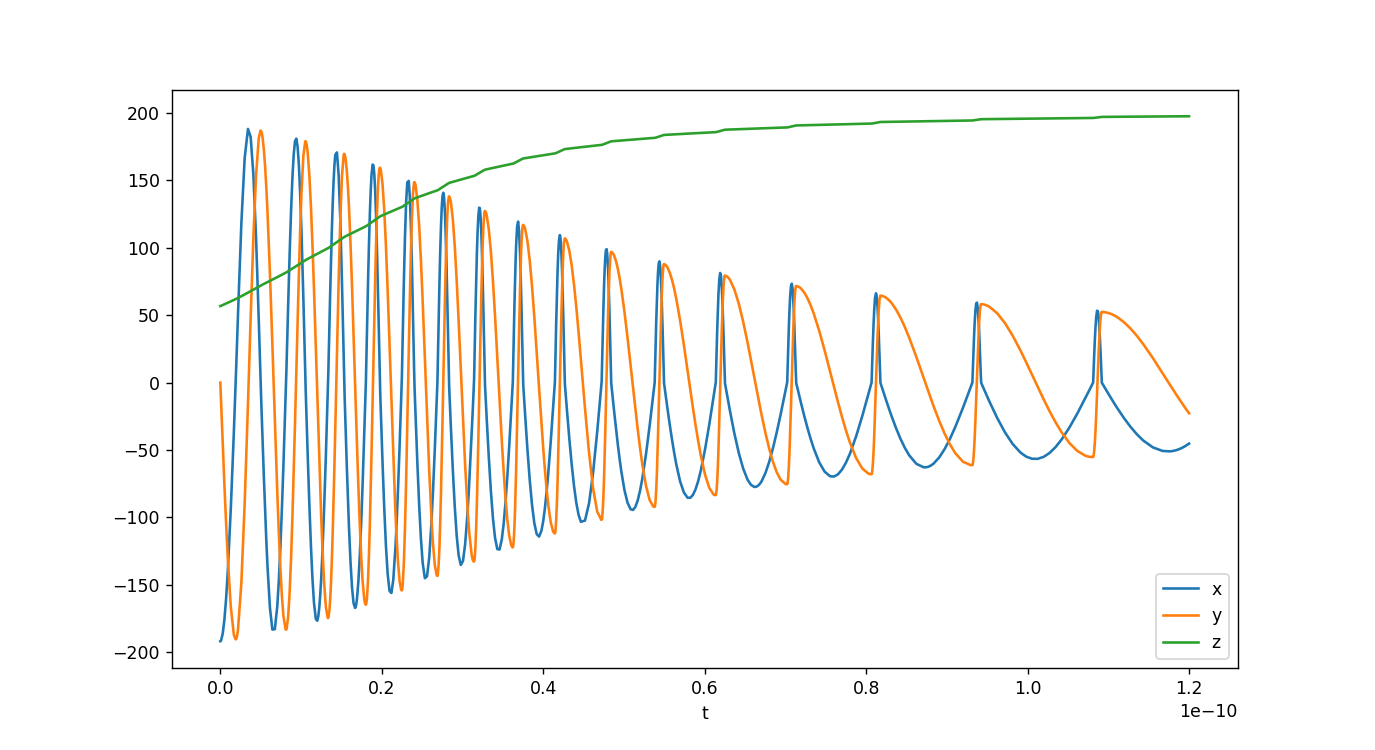

<AxesSubplot:xlabel='t'>

In [33]:
#%matplotlib inline
%matplotlib notebook
#%matplotlib qt

df.plot('t', figsize = (11, 6))
#plt.plot(sol.t, np.sqrt(sol.y[0]**2 + sol.y[1]**2 + sol.y[2]**2))

<IPython.core.display.Javascript object>


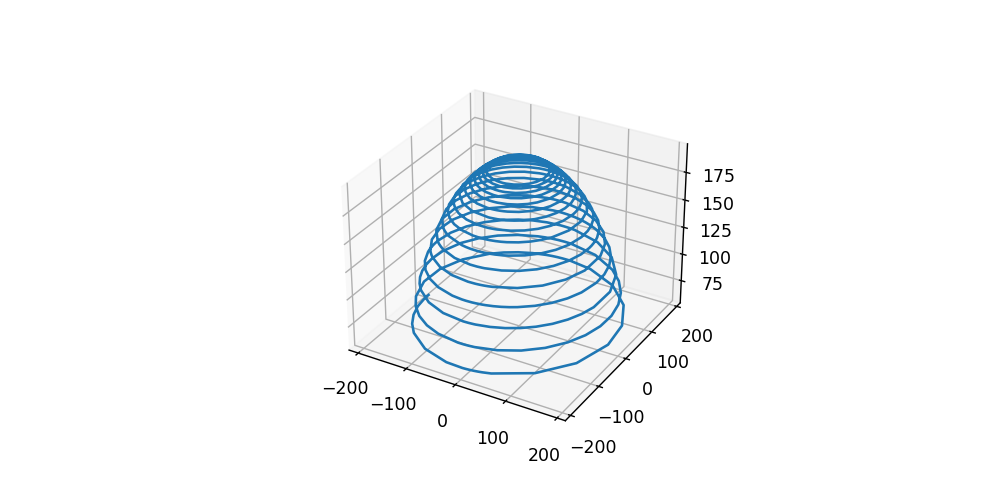

In [34]:
#%matplotlib inline
%matplotlib notebook
#%matplotlib qt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,4), dpi= 100, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111, projection='3d')
ax.plot(sol.y[0], sol.y[1], sol.y[2])

heff = [];
for i in range(len(sol.t)):
    heff.append(StonerWohlfarth_Heff(sol.y.T[i]))

heff = np.array(heff).T

#ax.plot(heff[0], heff[1], heff[2])

<IPython.core.display.Javascript object>


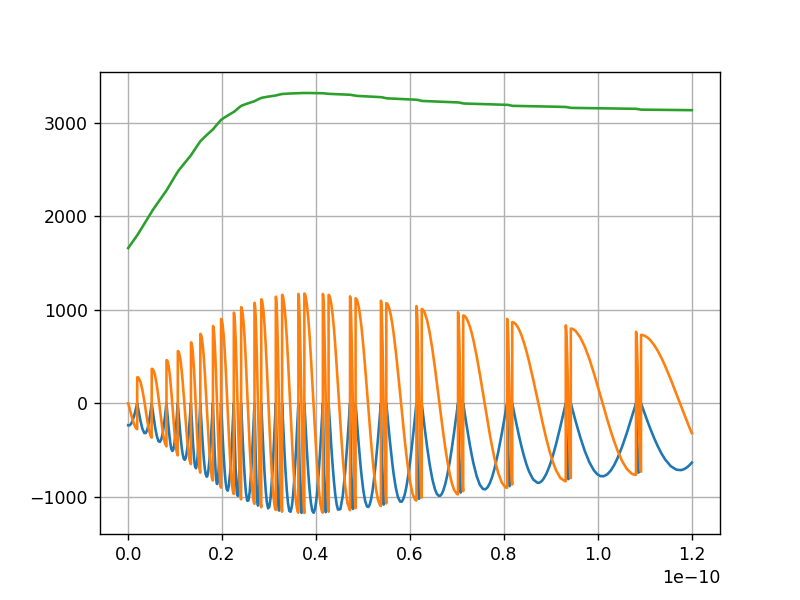

In [35]:

%matplotlib notebook
plt.grid(True)
plt.plot(sol.t, heff[0])
plt.plot(sol.t, heff[1])
plt.plot(sol.t, heff[2])

In [133]:
Heff(Hext, M0)

array([-3928.13389116,    -0.        ,  1790.43286243])

In [100]:
Hext

array([1969.61550602,    0.        ,  347.29635533])

In [101]:
M0

array([100.,   0., 150.])

<IPython.core.display.Javascript object>


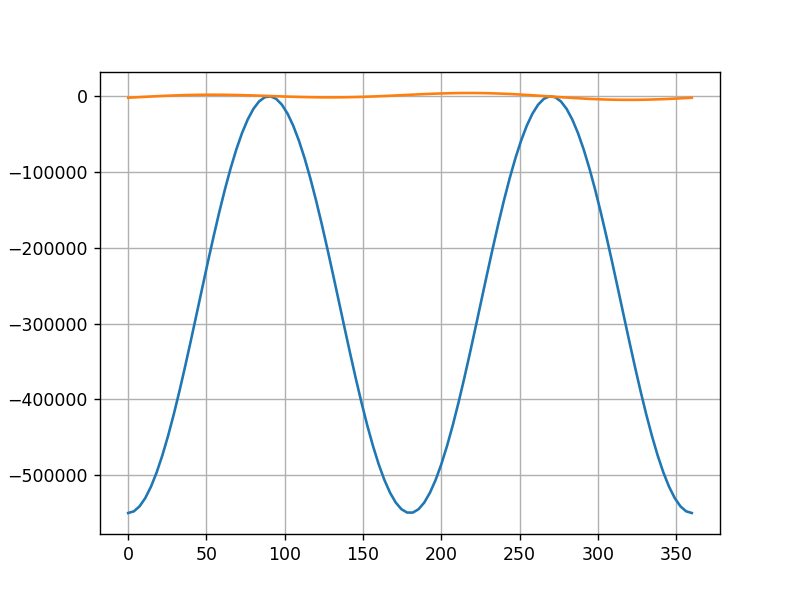

In [137]:
%matplotlib notebook
def F(Hext, M, tet):
    H_abs, H_tet, H_phi = cart2pol(Hext)
    M_abs, M_tet, M_phi = cart2pol(M)
    return -M_abs*H_abs*np.cos(H_tet - tet) - 0.5*M_abs*Hkeff*(np.cos(tet)**2)
    
def dF(Hext, M, tet):
    H_abs, H_tet, H_phi = cart2pol(Hext)
    M_abs, M_tet, M_phi = cart2pol(M)
    return 0.5*Hkeff*np.sin(2*tet) - H_abs*np.sin(H_tet - tet)
    
x = np.linspace(0,2*np.pi, 100)
y = []
y2 = []
for i in range(len(x)):
    y.append(F(Hext, M0, x[i]))
    y2.append(dF(Hext, M0, x[i]))

y = np.array(y)
plt.plot(np.rad2deg(x), y)
plt.plot(np.rad2deg(x), y2)
plt.grid()

In [149]:
Heff(Hext, M0)

array([1969.61550602,    0.        ,  347.29635533])

In [150]:
Hext

array([1969.61550602,    0.        ,  347.29635533])